# By: Om Bhatia

# GRIP: The Sparks Foundation

# Data Science and Business Analytics Intern

# Task 2: Prediction using Unsupervised ML

Aim: To Predict the optimum no. of clusters and represent it visually

Data Source: https://bit.ly/3kXTdox

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the data
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# dropping column that is not required
df.drop("Id", axis = 1, inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.shape, df.size

((150, 5), 750)

In [7]:
pd.crosstab(df['Species'], "count")

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


So there are 50 samples of each of three species

Check for null values

In [8]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Distribution of Data using Histogram 

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

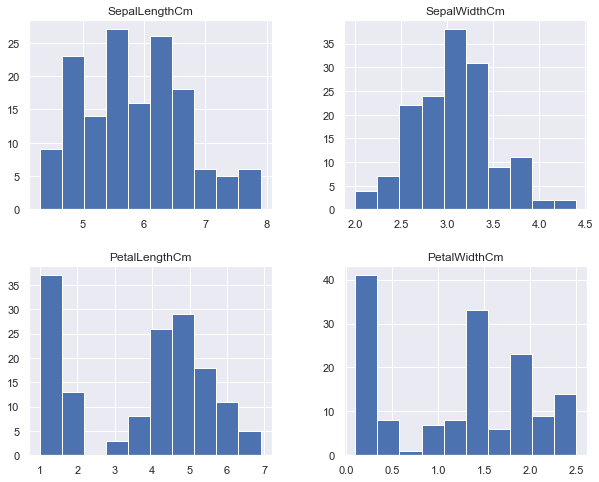

In [9]:
sns.set(rc = {'figure.figsize': (10, 8)})
df.hist()

Converting target columns to numeric type

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
print(f'Replacing values ',df['Species'].unique(), 'with [0, 1, 2]')
df.replace(to_replace = df['Species'].unique(), value = [0, 1, 2], inplace = True)
df

Replacing values  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] with [0, 1, 2]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


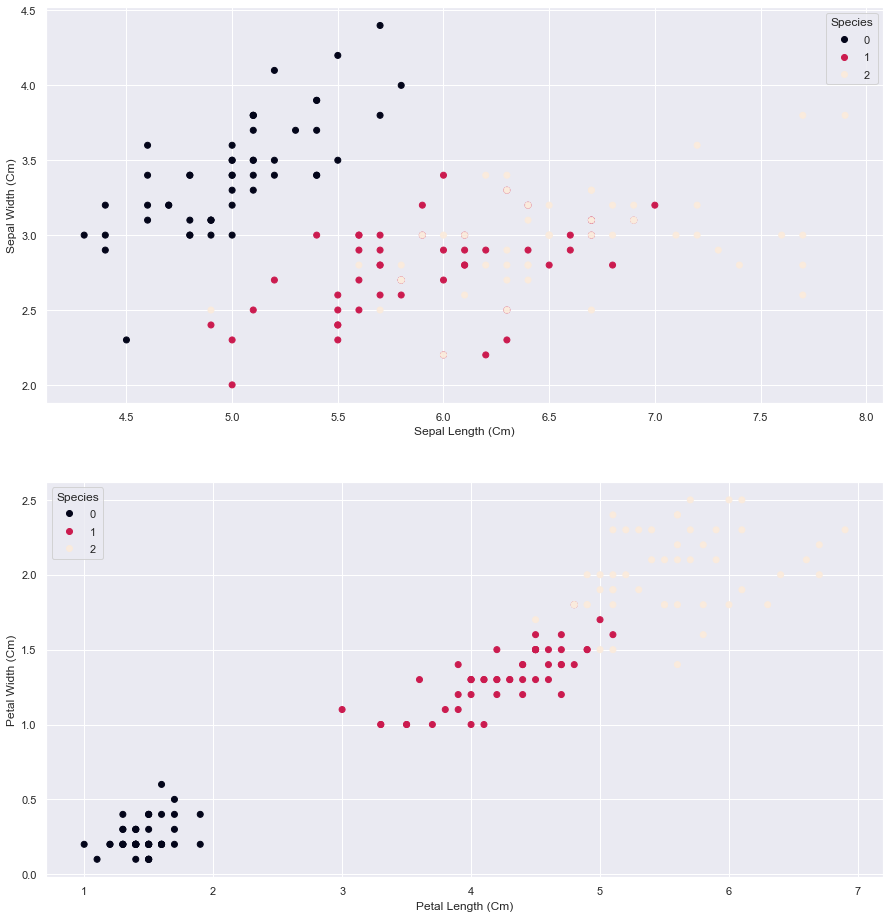

In [12]:
# create the axes
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 16))

# plotting the data
scatter1 = ax[0].scatter(x = df.SepalLengthCm, y = df.SepalWidthCm, c = df.Species)
scatter2 = ax[1].scatter(x = df.PetalLengthCm, y = df.PetalWidthCm, c = df.Species)

# customizing the plots
ax[0].set(xlabel = "Sepal Length (Cm)", ylabel = "Sepal Width (Cm)")
ax[1].set(xlabel = "Petal Length (Cm)", ylabel = "Petal Width (Cm)")

# add legend
ax[0].legend(* scatter1.legend_elements(), title = "Species")
ax[1].legend(* scatter2.legend_elements(), title = "Species")

As we can see that from the given data, 3 groups can be easily seprated

# Correlation Matrix

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

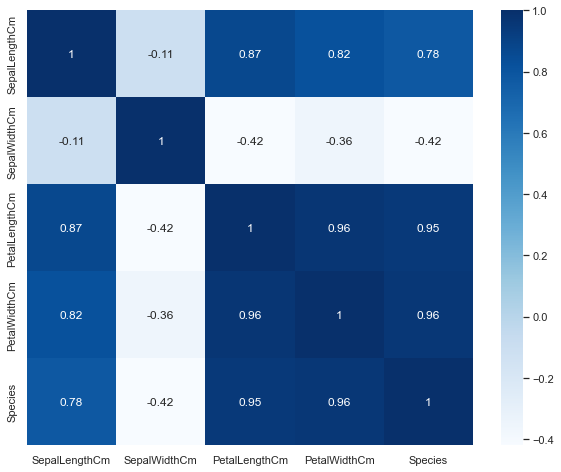

In [14]:
# representing correlation matrix in Heatmap
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

Above graph indicates a lot of columns in this dataset are highly associated with each other

This may also indicate that if we drop some columns that are highly correlated and keep only some of them, we might still be able to train our model

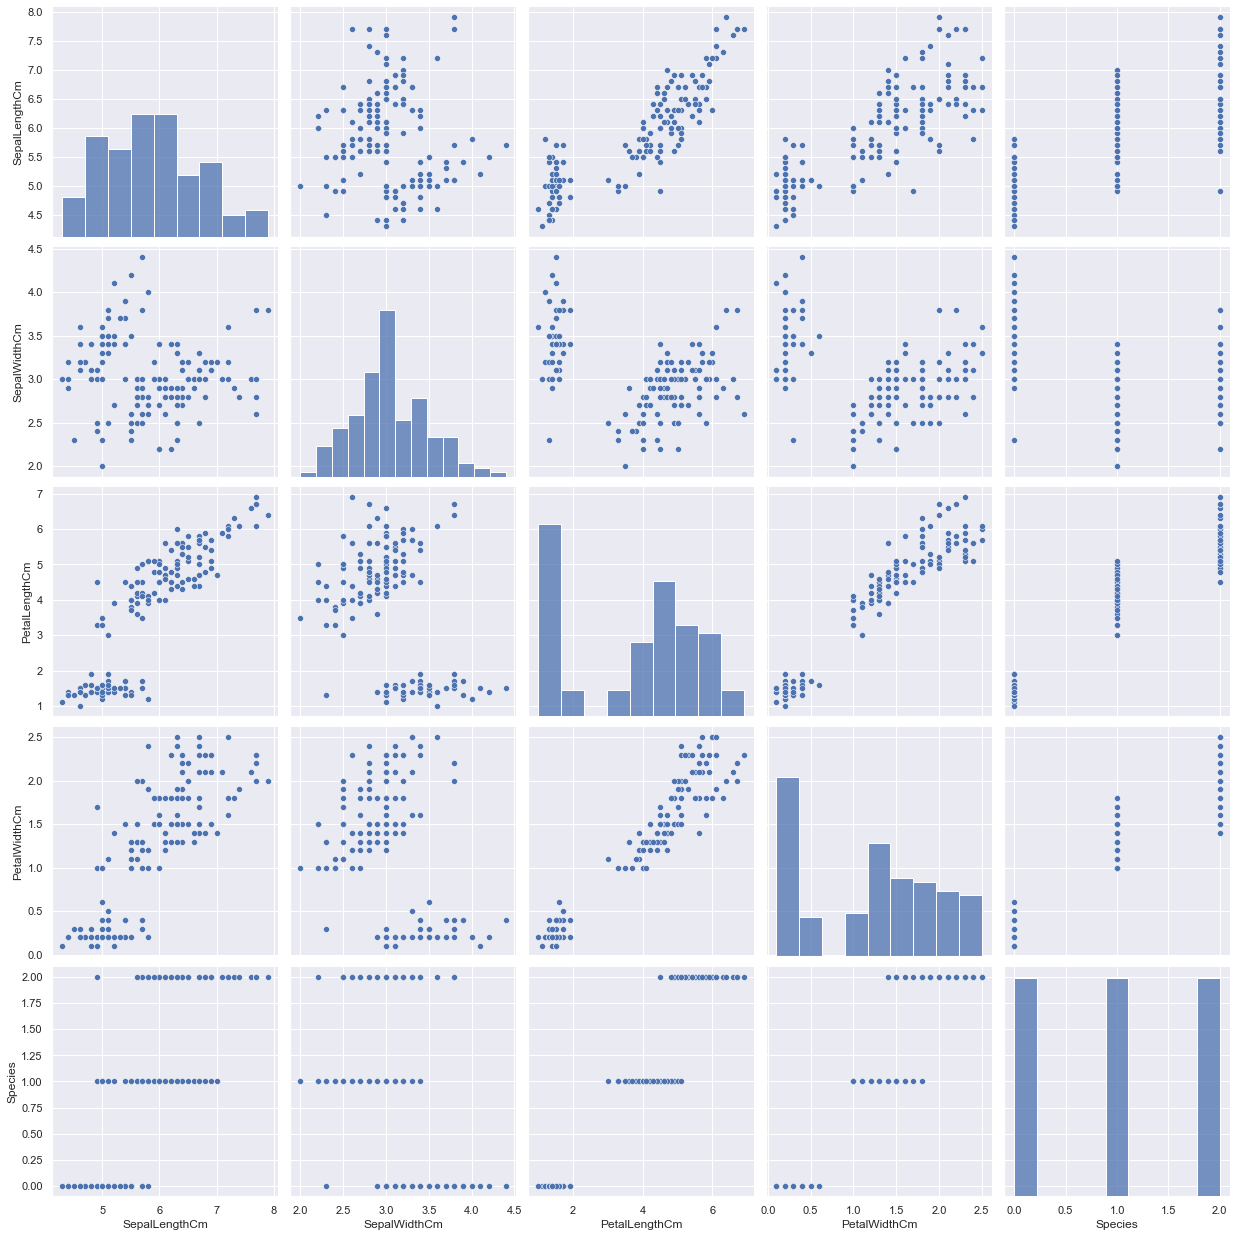

In [15]:
# representing correlation matrix using Pair plot
sns.pairplot(df, height = 3.5)

Finding Optimum no. of clusters

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.cluster import KMeans

within_cluster_sum_of_square = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df.drop("Species", axis = 1))
    within_cluster_sum_of_square.append(kmeans.inertia_)

# The Elbow Method

[Text(0.5, 0, 'No. of clusters'), Text(0, 0.5, 'Within Cluster sum of square')]

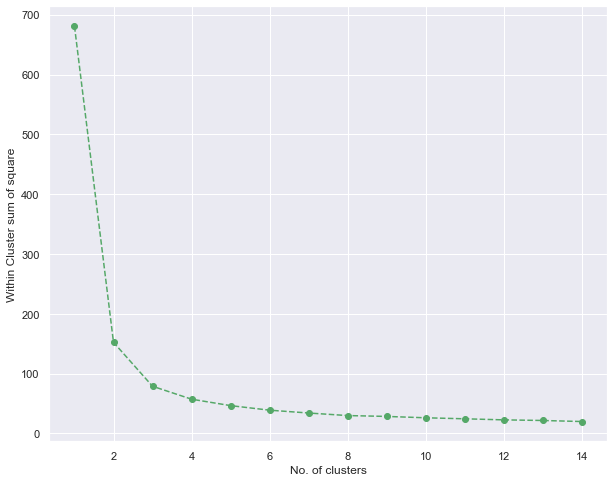

In [18]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 15), within_cluster_sum_of_square, 'go--')
ax.set(xlabel = "No. of clusters", ylabel = "Within Cluster sum of square")

The idea behind the elbow method is to identify the value of number of clusters where the distortion (within cluster sum of square) begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of no. of clusters

From the above graph we can infer that the optimum no. of clusters is 3

In [19]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(df.drop("Species", axis = 1))

In [20]:
# visualizing the predicted clusters
y_kmeans == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

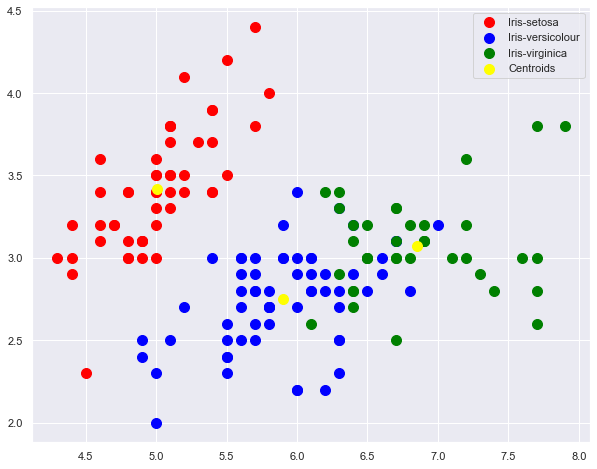

In [21]:
# visualising the clusters - On the first two columns
x = df.drop("Species", axis = 1).values

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend();

Visualizing Clusters from original data

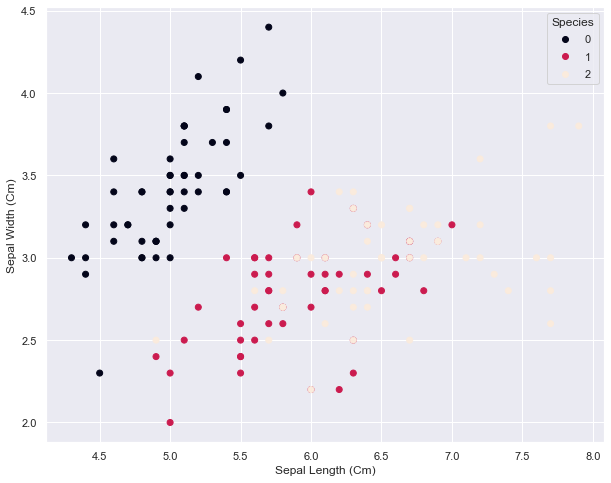

In [22]:
# create the axes
fig, ax = plt.subplots()

# plotting the data
scatter1 = ax.scatter(x = df.SepalLengthCm, y = df.SepalWidthCm, c = df.Species)

# customizing the plots
ax.set(xlabel = "Sepal Length (Cm)", ylabel = "Sepal Width (Cm)")

# add legend
ax.legend(* scatter1.legend_elements(), title = "Species")